In [4]:
import os
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import great_expectations as ge

import warnings
warnings.filterwarnings("ignore")

In [5]:
df1 = ge.read_csv("../data/example_data.csv")
df2 = ge.read_csv("../data/example_data_for_validation.csv")

In [6]:
df1

,Age,Income,Prior_Claims
0,23,25000,Yes
1,34,34000,Yes
2,67,100000,No
3,34,102000,No
4,56,78000,Yes
5,34,34000,No
6,56,67888,Yes
7,67,45612,No
8,45,12345,Yes
9,34,45000,No


In [14]:
df2

,Age,Income,Prior_Claims
0,90,25000,No
1,34,34000,Yes
2,67,100000,No
3,34,12000,No
4,56,78000,Yes
5,34,67000,No
6,56,67888,Yes
7,67,45612,No
8,78,1345,Yes
9,34,48000,No


In [4]:
df1.expect_column_values_to_be_in_set('Prior_Claims', ['Yes', 'No'])

{
  "meta": {},
  "result": {
    "element_count": 10,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
class DataDriftDetection(object):
    """
    """
    def __init__(self, past_data, new_data, label_col):
        self.past_data = ge.read_csv(past_data)
        self.new_data = ge.read_csv(new_data)
        self.labels = np.unique(self.past_data[label_col])
        
    def _compute_statistics_numerical(self, feature):
        min_past, min_new = np.min(self.past_data[feature]), np.min(self.new_data[feature])
        max_past, max_new = np.max(self.past_data[feature]), np.max(self.new_data[feature])
        median_past, median_new = np.median(self.past_data[feature]), np.median(self.new_data[feature])
        mean_past, mean_new = np.mean(self.past_data[feature]), np.mean(self.new_data[feature])
        std_past, std_new = np.std(self.past_data[feature]), np.std(self.new_data[feature])
        variance_past, variance_new = std_past**2, std_new**2
        kurtosis_past, kurtosis_new = scipy.stats.kurtosis(self.past_data[feature]), scipy.stats.kurtosis(self.new_data[feature])
        skewnewss_past, skewnewss_new = scipy.stats.skew(self.past_data[feature]), scipy.stats.skew(self.new_data[feature])
        self.numerical_statistics_past = {"min": min_past, "max": max_past, "median": median_past, "mean": mean_past, 
                                          "std": std_past, "variance": variance_past, "kurtosis": kurtosis_past, "skew": skewness_past}
        self.numerical_statistics_new = {"min": min_new, "max": max_new, "median": median_new, "mean": mean_new, 
                                         "std": std_new, "variance": variance_new, "kurtosis": kurtosis_new, "skew":skewness_new}
        return self.numerical_statistics_past, self.numerical_statistics_new
    
    def _compute_statistics_categorical(self, feature):
        
        return
    
    def bivariate_correlation(self, feature1, feature2):
        corr_past, p_val_past = scipy.stats.pearsonr(self.past_data[feature1], self.past_data[feature2])
        corr_new, p_val_new = scipy.stats.pearsonr(self.new_data[feature1], self.new_data[feature2])
        print("Correlation of past data: {}, p-value: {}".format(corr_past, p_val_past))
        print("Correlation of new data: {}, p-value: {}".format(corr_new, p_val_new))
        return (corr_past, p_val_past), (corr_new, p_val_new)
    
    def ks_test(self, feature):
        ks_stat, ks_p_val = scipy.stats.ks_2samp(self.past_data[feature], self.new_data[feature])
        

In [ ]:
data_drift = DataDriftDetection(df1, df2)

## Univariate Numerical Features

In [5]:
def _compute_statistics_numerical(past_data, new_data, feature):
    """

    :param feature:
    :return:
    """
    min_past, min_new = np.min(past_data[feature]), np.min(new_data[feature])
    max_past, max_new = np.max(past_data[feature]), np.max(new_data[feature])
    median_past, median_new = np.median(past_data[feature]), np.median(new_data[feature])
    mean_past, mean_new = np.mean(past_data[feature]), np.mean(new_data[feature])
    std_past, std_new = np.std(past_data[feature]), np.std(new_data[feature])
    variance_past, variance_new = std_past**2, std_new**2
    kurtosis_past, kurtosis_new = scipy.stats.kurtosis(past_data[feature]), scipy.stats.kurtosis(new_data[feature])
    skewness_past, skewness_new = scipy.stats.skew(past_data[feature]), scipy.stats.skew(new_data[feature])
    numerical_statistics_past = {"min": min_past, "max": max_past, "median": median_past, "mean": mean_past, 
                                 "std": std_past, "variance": variance_past, "kurtosis": kurtosis_past, "skew": skewness_past}
    numerical_statistics_new = {"min": min_new, "max": max_new, "median": median_new, "mean": mean_new, 
                                "std": std_new, "variance": variance_new, "kurtosis": kurtosis_new, "skew":skewness_new}
    return numerical_statistics_past, numerical_statistics_new

In [6]:
_compute_statistics_numerical(df1, df2, "Income")

({'min': 12345,
  'max': 102000,
  'median': 45306.0,
  'mean': 54384.5,
  'std': 29521.002202669202,
  'variance': 871489571.0499998,
  'kurtosis': -1.1511092829326848,
  'skew': 0.39021699800733356},
 {'min': 1345,
  'max': 100000,
  'median': 34000.0,
  'mean': 38045.769230769234,
  'std': 31352.179877970077,
  'variance': 982959183.1005918,
  'kurtosis': -1.034453809072976,
  'skew': 0.4410761864623665})

In [10]:
def plot_numerical(past_data, new_data, feature, bivariate=False, labels=None):
    """

    :param feature:
    :return:
    """
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.subplot(2, 2, 1)
    if bivariate:
        sns.histplot(data=past_data, x=feature, hue=labels, kde=True)
    else:
        sns.histplot(data=past_data, x=feature, kde=True)
    plt.title("Baseline Data Distribution for {}".format(feature))
    plt.subplot(2, 2, 2)
    if bivariate:
        sns.histplot(data=new_data, x=feature, hue=labels, kde=True)
    else:
        sns.histplot(data=new_data, x=feature, kde=True)
    plt.title("New Data Distribution for {}".format(feature))
    plt.show()

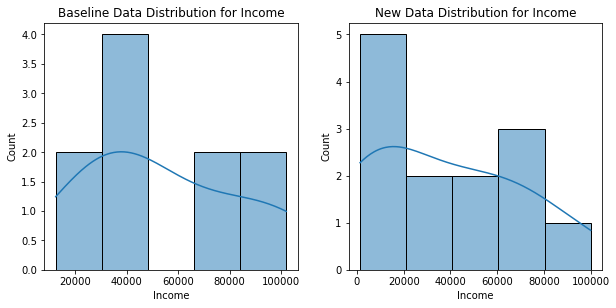

In [11]:
plot_numerical(df1, df2, "Income")

In [23]:
def ks_test(past_data, new_data, feature):
    """

    :param feature:
    :return:
    """
    ks_stat, ks_p_val = scipy.stats.ks_2samp(past_data[feature], new_data[feature])
    print("KS Statistic: {}, p-value: {}".format(ks_stat, ks_p_val))
    return ks_stat, ks_p_val

In [15]:
ks_test(df1, df2, "Income")

KS Statistic: 0.38461538461538464, p-value: 0.29269552630704876


(0.38461538461538464, 0.29269552630704876)

## Bivariate Numerical Features

In [19]:
_compute_statistics_numerical(df1[df1["Prior_Claims"]=="Yes"], df2[df2["Prior_Claims"]=="Yes"], "Income")

({'min': 12345,
  'max': 78000,
  'median': 34000.0,
  'mean': 43446.6,
  'std': 25251.314069568736,
  'variance': 637628862.24,
  'kurtosis': -1.602067232382904,
  'skew': 0.23167087298266742},
 {'min': 1345,
  'max': 78000,
  'median': 34000.0,
  'mean': 36926.6,
  'std': 31762.495592128776,
  'variance': 1008856126.24,
  'kurtosis': -1.6969055299286542,
  'skew': 0.10119597589370695})

In [20]:
_compute_statistics_numerical(df1[df1["Prior_Claims"]=="No"], df2[df2["Prior_Claims"]=="No"], "Income")

({'min': 34000,
  'max': 102000,
  'median': 45612.0,
  'mean': 65322.4,
  'std': 29429.151653420122,
  'variance': 866074967.0400003,
  'kurtosis': -1.7895186964243186,
  'skew': 0.34730781762767},
 {'min': 3450,
  'max': 100000,
  'median': 35306.0,
  'mean': 38745.25,
  'std': 31072.51973911192,
  'variance': 965501482.9375,
  'kurtosis': -0.6375387226302913,
  'skew': 0.6717715210064092})

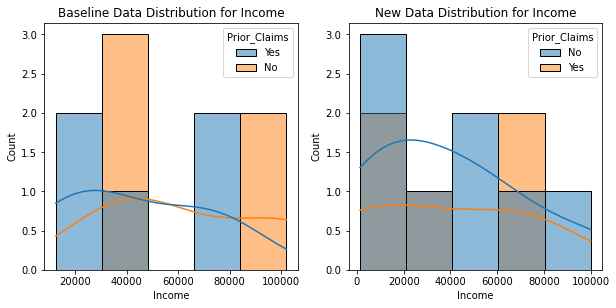

In [16]:
plot_numerical(df1, df2, "Income", True, "Prior_Claims")

In [22]:
ks_test(df1[df1["Prior_Claims"]=="Yes"], df2[df2["Prior_Claims"]=="Yes"], "Income")

KS Statistic: 0.4, p-value: 0.873015873015873


(0.4, 0.873015873015873)

In [21]:
ks_test(df1[df1["Prior_Claims"]=="No"], df2[df2["Prior_Claims"]=="No"], "Income")

KS Statistic: 0.5, p-value: 0.31623931623931634


(0.5, 0.31623931623931634)

In [24]:
def bivariate_correlation(past_data, new_data, feature1, feature2):
    """

    :param feature1:
    :param feature2:
    :return:
    """
    corr_past, p_val_past = scipy.stats.pearsonr(past_data[feature1], past_data[feature2])
    corr_new, p_val_new = scipy.stats.pearsonr(new_data[feature1], new_data[feature2])
    print("Correlation of past data: {}, p-value: {}".format(corr_past, p_val_past))
    print("Correlation of new data: {}, p-value: {}".format(corr_new, p_val_new))
    return (corr_past, p_val_past), (corr_new, p_val_new)

In [25]:
bivariate_correlation(df1, df2, "Age", "Income")

Correlation of past data: 0.4345540496912696, p-value: 0.20949519275100018
Correlation of new data: -0.12032144905901232, p-value: 0.6953979222993741


((0.4345540496912696, 0.20949519275100018),
 (-0.12032144905901232, 0.6953979222993741))

## Univariate Categorial Features

In [9]:
df1["Prior_Claims"].value_counts()

Yes    5
No     5
Name: Prior_Claims, dtype: int64

In [13]:
df2["Prior_Claims"].value_counts()

No     8
Yes    5
Name: Prior_Claims, dtype: int64

## Bivariate Categorial Features